In [7]:
# conectando ao google drive para depois pegar o zip das imagens -----------------
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [40]:
# esta célula é para deixar o treinamento mais rápido
# pois usa o drive temporário do colab ... se for usar direto do google drive fica muuuuito lento!

!cd /content/rn_images
!unzip /content/drive/MyDrive/ProjetosLetsCode/datasets/rn_images/rn_images.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: rn_images/cat/Sphynx_90.jpg  
  inflating: rn_images/cat/Sphynx_91.jpg  
  inflating: rn_images/cat/Sphynx_92.jpg  
  inflating: rn_images/cat/Sphynx_93.jpg  
  inflating: rn_images/cat/Sphynx_94.jpg  
  inflating: rn_images/cat/Sphynx_95.jpg  
  inflating: rn_images/cat/Sphynx_96.jpg  
  inflating: rn_images/cat/Sphynx_98.jpg  
  inflating: rn_images/cat/Sphynx_99.jpg  
   creating: rn_images/dog/
  inflating: rn_images/dog/american_bulldog_10.jpg  
  inflating: rn_images/dog/american_bulldog_100.jpg  
  inflating: rn_images/dog/american_bulldog_101.jpg  
  inflating: rn_images/dog/american_bulldog_102.jpg  
  inflating: rn_images/dog/american_bulldog_103.jpg  
  inflating: rn_images/dog/american_bulldog_104.jpg  
  inflating: rn_images/dog/american_bulldog_105.jpg  
  inflating: rn_images/dog/american_bulldog_106.jpg  
  inflating: rn_images/dog/american_bulldog_107.jpg  
  inflating: rn_images/dog/american_bulld

In [2]:
import glob
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error

---  
## Modelo 01 - CNN simples

In [41]:
# criando bases de teste e validação ----------------------------------------------
#dir_name = '/content/drive/MyDrive/ProjetosLetsCode/datasets/rn_images'
dir_name = '/content/rn_images'

train_datagen = image.ImageDataGenerator(validation_split=0.2, rescale=1/255)  ## define o generator escalando as imagens do dataset

train_dataset = train_datagen.flow_from_directory( ### pega as imagens de um dataset
        dir_name,
        color_mode = 'rgb',
        target_size=(128, 128),
        batch_size=64,
        class_mode='binary',
        subset='training',
        shuffle = True)

val_dataset = train_datagen.flow_from_directory( ### pega as imagens de um dataset
        dir_name,
        color_mode = 'rgb',
        target_size=(128, 128),
        batch_size=64,
        class_mode='binary',
        subset='validation',
        shuffle = True)

Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


In [6]:
# dimensões e canais de cores ----------------------------------------------------
train_dataset[0][0].shape

(64, 128, 128, 3)

0.0


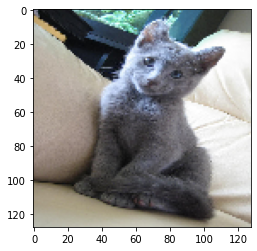

0.0


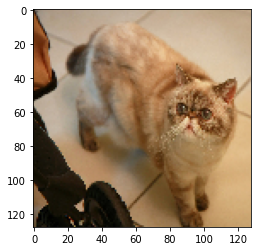

0.0


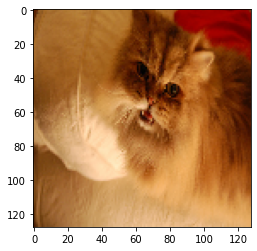

1.0


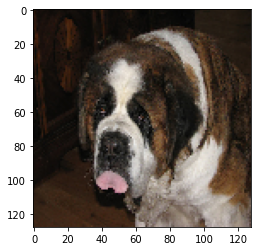

1.0


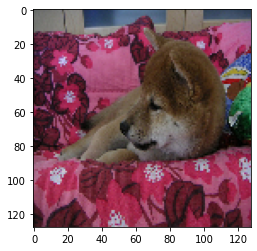

In [ ]:
# visualizando algumas imagens e os labels atribuidos ----------------------------
for _ in range(5):
    img, label = train_dataset.next()
    print(label[_])
    plt.imshow(img[_])
    plt.show()

In [ ]:
# iniciando a arquitetura
cnn = Sequential()

cnn.add(Conv2D(24, (5,5), activation='relu', input_shape=(128, 128, 3), padding='same'))
cnn.add(MaxPooling2D())  # o  default é 2x2

cnn.add(Conv2D(48, (5,5), activation='relu', padding='same'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(96, (5,5), activation='relu', padding='same'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(128, (5,5), activation='relu', padding='same'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))

cnn.add(Dense(1)) # importante que a última camada tenha mesma quantidade de classes da saída
cnn.add(Activation('sigmoid'))
                 
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        115296    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [ ]:
cnn.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

checkpoint = [tf.keras.callbacks.ModelCheckpoint(
                filepath="convnet_from_scratch.keras",
                save_best_only=True,
                monitor="val_loss")]

# Treinamento
historico = cnn.fit(train_dataset,
                    epochs = 25, 
                    verbose = 1,
                    batch_size = 32,
                    validation_data = val_dataset,
                    callbacks = [es, checkpoint])

Epoch 1/25
93/93 [==============================] - 41s 390ms/step - loss: 0.7806 - accuracy: 0.6737 - val_loss: 0.6202 - val_accuracy: 0.6773
Epoch 2/25
93/93 [==============================] - 31s 335ms/step - loss: 0.6241 - accuracy: 0.6754 - val_loss: 0.6567 - val_accuracy: 0.6610
Epoch 3/25
93/93 [==============================] - 31s 337ms/step - loss: 0.5890 - accuracy: 0.6918 - val_loss: 0.5956 - val_accuracy: 0.6915
Epoch 4/25
93/93 [==============================] - 32s 345ms/step - loss: 0.5403 - accuracy: 0.7314 - val_loss: 0.8992 - val_accuracy: 0.4621
Epoch 5/25
93/93 [==============================] - 31s 338ms/step - loss: 0.5113 - accuracy: 0.7503 - val_loss: 0.5251 - val_accuracy: 0.7442
Epoch 6/25
93/93 [==============================] - 31s 337ms/step - loss: 0.4563 - accuracy: 0.7862 - val_loss: 0.4746 - val_accuracy: 0.7747
Epoch 7/25
93/93 [==============================] - 32s 342ms/step - loss: 0.4209 - accuracy: 0.8104 - val_loss: 0.7480 - val_accuracy: 0.7165

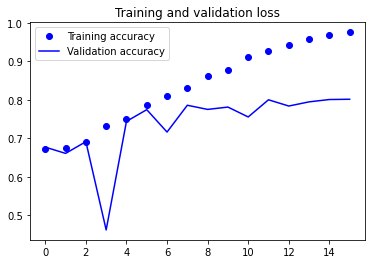

In [ ]:
accuracy = historico.history['accuracy']
val_accuracy = historico.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# apesar da validação não cair, dependendo quem analisa, pode considerar um leve overfit devido a constatnte subida do treino
# soluções seriam: 1) reduzir neurônios, 2) filtros das camadas conv, 3) adcionar dropout

---  
## Modelo 02 - CNN com escala de cinza

In [42]:
dir_name = '/content/rn_images'

train_datagen_gray = image.ImageDataGenerator(validation_split=0.2, rescale=1/255)  ## define o generator escalando as imagens do dataset

train_dataset_gray = train_datagen.flow_from_directory( ### pega as imagens de um dataset
        dir_name,
        color_mode = 'grayscale',
        target_size=(128, 128),
        batch_size=64,
        class_mode='binary',
        subset='training',
        shuffle = True)

val_dataset_gray = train_datagen.flow_from_directory( ### pega as imagens de um dataset
        dir_name,
        color_mode = 'grayscale',
        target_size=(128, 128),
        batch_size=64,
        class_mode='binary',
        subset='validation',
        shuffle = True)

Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


In [8]:
# dimensões e canais de cores ----------------------------------------------------
train_dataset_gray[0][0].shape

(64, 128, 128, 1)

1.0


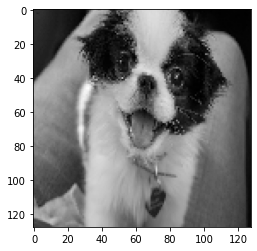

1.0


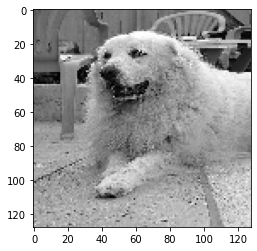

0.0


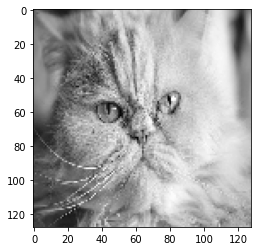

1.0


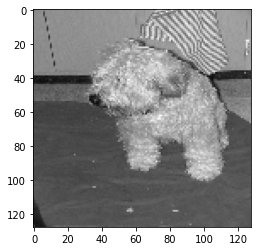

1.0


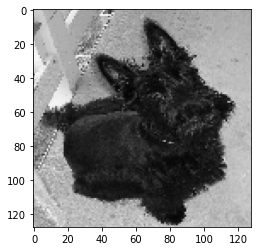

In [52]:
# visualizando algumas imagens e os labels atribuidos ----------------------------
for _ in range(5):
    img, label = train_dataset_gray.next()
    print(label[_])
    plt.imshow(img[_][:,:,0], cmap='gray')
    plt.show()

In [ ]:
# iniciando a arquitetura
# como a RGB apresentou um overfitting, aqui :
# 1) acrescentaremos dropout 
# 2) reduziremos 1 camada conv
# 3) reduziremos filtros das conv
# 4) reduziremos nerônios da dense

cnn_gray = Sequential()

cnn_gray.add(Conv2D(12, (5,5), activation='relu', input_shape=(128, 128, 1), padding='same'))
cnn_gray.add(MaxPooling2D())  # o  default é 2x2
cnn_gray.add(Dropout(0.25))

cnn_gray.add(Conv2D(24, (5,5), activation='relu', padding='same'))
cnn_gray.add(MaxPooling2D())
cnn_gray.add(Dropout(0.25))

cnn_gray.add(Conv2D(48, (5,5), activation='relu', padding='same'))
cnn_gray.add(MaxPooling2D())
cnn_gray.add(Dropout(0.25))

cnn_gray.add(Flatten())
cnn_gray.add(Dense(24, activation='relu'))

cnn_gray.add(Dense(1)) # importante que a última camada tenha mesma quantidade de classes da saída
cnn_gray.add(Activation('sigmoid'))
                 
cnn_gray.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 12)      312       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 12)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 64, 64, 12)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 24)        7224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 24)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 24)       

In [ ]:
cnn_gray.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

es_gray = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

checkpoint_gray = [tf.keras.callbacks.ModelCheckpoint(
                filepath="convnet_gray_from_scratch.keras",
                save_best_only=True,
                monitor="val_loss")]

# Treinamento
historico_gray = cnn_gray.fit(train_dataset_gray,
                    epochs = 25, 
                    verbose = 1,
                    batch_size = 32,
                    validation_data = val_dataset_gray,
                    callbacks = [es_gray, checkpoint_gray])

Epoch 1/25
93/93 [==============================] - 37s 387ms/step - loss: 0.6539 - accuracy: 0.6734 - val_loss: 0.6236 - val_accuracy: 0.6752
Epoch 2/25
93/93 [==============================] - 33s 356ms/step - loss: 0.6014 - accuracy: 0.6752 - val_loss: 0.5818 - val_accuracy: 0.6752
Epoch 3/25
93/93 [==============================] - 32s 347ms/step - loss: 0.5595 - accuracy: 0.6876 - val_loss: 0.5529 - val_accuracy: 0.6942
Epoch 4/25
93/93 [==============================] - 32s 349ms/step - loss: 0.5296 - accuracy: 0.7353 - val_loss: 0.5337 - val_accuracy: 0.7422
Epoch 5/25
93/93 [==============================] - 32s 346ms/step - loss: 0.5039 - accuracy: 0.7568 - val_loss: 0.5283 - val_accuracy: 0.7334
Epoch 6/25
93/93 [==============================] - 33s 350ms/step - loss: 0.4781 - accuracy: 0.7764 - val_loss: 0.4872 - val_accuracy: 0.7700
Epoch 7/25
93/93 [==============================] - 32s 347ms/step - loss: 0.4553 - accuracy: 0.7813 - val_loss: 0.4863 - val_accuracy: 0.7625

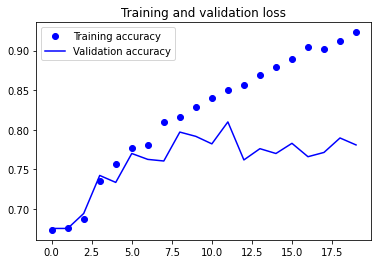

In [ ]:
accuracy = historico_gray.history['accuracy']
val_accuracy = historico_gray.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# diminuimos a complexidade do modelo e mantemos a acurácia
# ainda com overfiting

---  
## Modelo 03 - arquitetura da literatura: pré-treinada "as is"

In [ ]:
base_model = tf.keras.applications.EfficientNetV2B2( #### escolha de uma arquitetura do keras.applications
              weights='imagenet', ### utiliza os pesos da imagenet 
              input_shape=(128, 128, 3),
              include_top=False)  ### exclui a camada softmax

base_model.trainable = False

inputs = tf.keras.Input(shape=(128, 128, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

pt_model = tf.keras.Model(inputs, outputs)

pt_model.summary()

35848192/35839040 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 4, 4, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 1)                 1409      
                                                                 
Total params: 8,770,783
Trainable params: 1,409
Non-trainable params: 8,769,374
________________________________________________

In [ ]:
pt_model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

es_pt = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

checkpoint_pt = [tf.keras.callbacks.ModelCheckpoint(
                filepath="pt_model_NetV2B2.keras",
                save_best_only=True,
                monitor="val_loss")]

# Treinamento
historico_pt = pt_model.fit(train_dataset,
                    epochs = 25, 
                    verbose = 1,
                    batch_size = 32,
                    validation_data = val_dataset,
                    callbacks = [es_pt, checkpoint_pt])

Epoch 1/25
93/93 [==============================] - 48s 378ms/step - loss: 0.6338 - accuracy: 0.6752 - val_loss: 0.6258 - val_accuracy: 0.6752
Epoch 2/25
93/93 [==============================] - 34s 371ms/step - loss: 0.6303 - accuracy: 0.6752 - val_loss: 0.6220 - val_accuracy: 0.6752
Epoch 3/25
93/93 [==============================] - 33s 354ms/step - loss: 0.6291 - accuracy: 0.6752 - val_loss: 0.6243 - val_accuracy: 0.6752
Epoch 4/25
93/93 [==============================] - 35s 373ms/step - loss: 0.6276 - accuracy: 0.6752 - val_loss: 0.6182 - val_accuracy: 0.6752
Epoch 5/25
93/93 [==============================] - 36s 389ms/step - loss: 0.6260 - accuracy: 0.6752 - val_loss: 0.6146 - val_accuracy: 0.6752
Epoch 6/25
93/93 [==============================] - 35s 376ms/step - loss: 0.6242 - accuracy: 0.6752 - val_loss: 0.6306 - val_accuracy: 0.6773
Epoch 7/25
93/93 [==============================] - 37s 397ms/step - loss: 0.6242 - accuracy: 0.6752 - val_loss: 0.6106 - val_accuracy: 0.6752

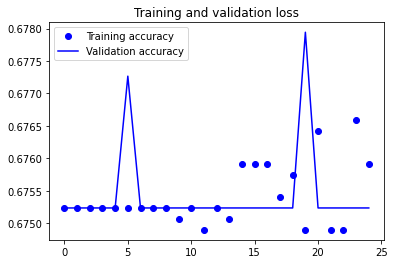

In [ ]:
accuracy = historico_pt.history['accuracy']
val_accuracy = historico_pt.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# desempenho não foi tão bom quanto a CNN própria

---  
## Modelo 04 - arquitetura da literatura: parcialmente descongelada

In [9]:
base_model = tf.keras.applications.EfficientNetV2B2( #### escolha de uma arquitetura do keras.applications
              weights='imagenet', ### utiliza os pesos da imagenet 
              input_shape=(128, 128, 3),
              include_top=False)  ### exclui a camada softmax

for layer in base_model.layers[::2]: # habilitar camada para treino a cada 2 camadas
    layer.trainable = False

inputs = tf.keras.Input(shape=(128, 128, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

pt_model2 = tf.keras.Model(inputs, outputs)

pt_model2.summary()

35848192/35839040 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 4, 4, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1409      
                                                                 
Total params: 8,770,783
Trainable params: 4,264,547
Non-trainable params: 4,506,236
____________________________________________

In [11]:
pt_model2.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

es_pt2 = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

checkpoint_pt2 = [tf.keras.callbacks.ModelCheckpoint(
                filepath="pt_model2_NetV2B2.keras",
                save_best_only=True,
                monitor="val_loss")]

# Treinamento
historico_pt2 = pt_model2.fit(train_dataset,
                    epochs = 25, 
                    verbose = 1,
                    batch_size = 32,
                    validation_data = val_dataset,
                    callbacks = [es_pt2, checkpoint_pt2])

Epoch 1/25
93/93 [==============================] - 63s 422ms/step - loss: 0.2298 - accuracy: 0.9034 - val_loss: 0.7545 - val_accuracy: 0.5365
Epoch 2/25
93/93 [==============================] - 35s 375ms/step - loss: 0.0767 - accuracy: 0.9709 - val_loss: 0.9207 - val_accuracy: 0.3552
Epoch 3/25
93/93 [==============================] - 36s 382ms/step - loss: 0.0479 - accuracy: 0.9838 - val_loss: 0.7538 - val_accuracy: 0.6062
Epoch 4/25
93/93 [==============================] - 38s 406ms/step - loss: 0.0318 - accuracy: 0.9888 - val_loss: 1.3099 - val_accuracy: 0.3877
Epoch 5/25
93/93 [==============================] - 36s 387ms/step - loss: 0.0290 - accuracy: 0.9900 - val_loss: 1.7502 - val_accuracy: 0.3248
Epoch 6/25
93/93 [==============================] - 35s 374ms/step - loss: 0.0217 - accuracy: 0.9924 - val_loss: 1.7796 - val_accuracy: 0.3322
Epoch 7/25
93/93 [==============================] - 35s 378ms/step - loss: 0.0226 - accuracy: 0.9941 - val_loss: 1.2281 - val_accuracy: 0.3315

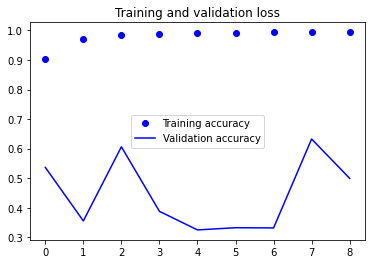

In [12]:
accuracy = historico_pt2.history['accuracy']
val_accuracy = historico_pt2.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# overfit muito forte

---  
## Modelo 04 - arquitetura da literatura: parcialmente descongelada + adição de camadas

In [ ]:
# dar uma olhada neste site
# https://learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/#:~:text=In%20Keras%2C%20each%20layer%20has,layers%20we%20want%20to%20train.

In [16]:
len(base_model.layers)

327

In [18]:
base_model = tf.keras.applications.EfficientNetV2B2( #### escolha de uma arquitetura do keras.applications
              weights='imagenet', ### utiliza os pesos da imagenet 
              input_shape=(128, 128, 3),
              include_top=False)  ### exclui a camada softmax

for layer in base_model.layers[200:]: # habilitar camada para treino a cada 3 camadas
    layer.trainable = False

# Create the model
pt_model3 = Sequential()
 
# Add the base model
pt_model3.add(base_model)

# Add new layers
pt_model3.add(Flatten())
pt_model3.add(Dense(64, activation='relu'))
pt_model3.add(Dropout(0.5))
pt_model3.add(Dense(64, activation='relu'))
pt_model3.add(Dropout(0.5))
pt_model3.add(Dense(1, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
pt_model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 4, 4, 1408)       8769374   
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 22528)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1441856   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [19]:
pt_model3.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

es_pt3 = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

checkpoint_pt3 = [tf.keras.callbacks.ModelCheckpoint(
                filepath="pt_model3_NetV2B2.keras",
                save_best_only=True,
                monitor="val_loss")]

# Treinamento
historico_pt3 = pt_model3.fit(train_dataset,
                    epochs = 25, 
                    verbose = 1,
                    batch_size = 32,
                    validation_data = val_dataset,
                    callbacks = [es_pt3, checkpoint_pt3])

Epoch 1/25
93/93 [==============================] - 53s 407ms/step - loss: 0.6382 - accuracy: 0.6857 - val_loss: 0.7500 - val_accuracy: 0.3762
Epoch 2/25
93/93 [==============================] - 36s 385ms/step - loss: 0.3831 - accuracy: 0.8432 - val_loss: 0.6871 - val_accuracy: 0.6529
Epoch 3/25
93/93 [==============================] - 36s 386ms/step - loss: 0.2603 - accuracy: 0.8997 - val_loss: 0.6832 - val_accuracy: 0.6752
Epoch 4/25
93/93 [==============================] - 36s 386ms/step - loss: 0.2066 - accuracy: 0.9301 - val_loss: 0.7026 - val_accuracy: 0.4608
Epoch 5/25
93/93 [==============================] - 35s 380ms/step - loss: 0.1540 - accuracy: 0.9437 - val_loss: 0.7463 - val_accuracy: 0.3769
Epoch 6/25
93/93 [==============================] - 41s 436ms/step - loss: 0.1363 - accuracy: 0.9530 - val_loss: 1.0249 - val_accuracy: 0.3261
Epoch 7/25
93/93 [==============================] - 36s 384ms/step - loss: 0.1182 - accuracy: 0.9638 - val_loss: 0.6690 - val_accuracy: 0.6752

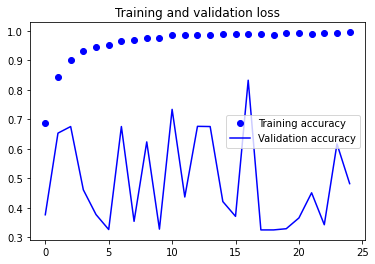

In [20]:
accuracy = historico_pt3.history['accuracy']
val_accuracy = historico_pt3.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# pelos resultados obtidos nos últimos 3 treinos:
# - EfficientNetV2B2: congelada
# - EfficientNetV2B2: parcialmente congelada
# - EfficientNetV2B2: parcialmente congelada + novas camadas
# ... onde não foi alcançado um accuracy melhor que a CNN própria, 
# surge a hipótese de que o modelo base 'EfficientNetV2B2' não parece ser eficiente para este problema

---  
## Modelo 04 - arquitetura da literatura: totalmente descongelada

In [23]:
base_model = tf.keras.applications.EfficientNetV2B2( #### escolha de uma arquitetura do keras.applications
              weights='imagenet', ### utiliza os pesos da imagenet 
              input_shape=(128, 128, 3),
              include_top=False)  ### exclui a camada softmax

base_model.trainable = True

inputs = tf.keras.Input(shape=(128, 128, 3))
x = base_model(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

pt_model4 = tf.keras.Model(inputs, outputs)

pt_model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 4, 4, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d_3   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 1)                 1409      
                                                                 
Total params: 8,770,783
Trainable params: 8,688,495
Non-trainable params: 82,288
_________________________________________________________________


In [24]:
pt_model4.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

es_pt4 = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

checkpoint_pt4 = [tf.keras.callbacks.ModelCheckpoint(
                filepath="pt_model4_NetV2B2.keras",
                save_best_only=True,
                monitor="val_loss")]

# Treinamento
historico_pt4 = pt_model4.fit(train_dataset,
                    epochs = 25, 
                    verbose = 1,
                    batch_size = 32,
                    validation_data = val_dataset,
                    callbacks = [es_pt4, checkpoint_pt4])

Epoch 1/25
93/93 [==============================] - 58s 421ms/step - loss: 0.2913 - accuracy: 0.8745 - val_loss: 0.2173 - val_accuracy: 0.9229
Epoch 2/25
93/93 [==============================] - 37s 396ms/step - loss: 0.1152 - accuracy: 0.9570 - val_loss: 0.2068 - val_accuracy: 0.9276
Epoch 3/25
93/93 [==============================] - 36s 390ms/step - loss: 0.0667 - accuracy: 0.9751 - val_loss: 0.2368 - val_accuracy: 0.9276
Epoch 4/25
93/93 [==============================] - 36s 388ms/step - loss: 0.0415 - accuracy: 0.9846 - val_loss: 0.2557 - val_accuracy: 0.9398
Epoch 5/25
93/93 [==============================] - 36s 386ms/step - loss: 0.0377 - accuracy: 0.9865 - val_loss: 0.2669 - val_accuracy: 0.9229
Epoch 6/25
93/93 [==============================] - 37s 393ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.1965 - val_accuracy: 0.9445
Epoch 7/25
93/93 [==============================] - 37s 396ms/step - loss: 0.0287 - accuracy: 0.9902 - val_loss: 0.2373 - val_accuracy: 0.9364

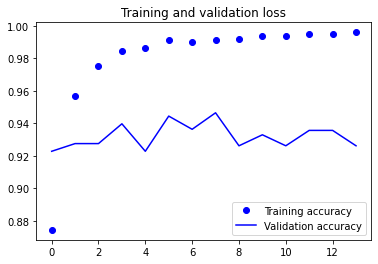

In [25]:
accuracy = historico_pt4.history['accuracy']
val_accuracy = historico_pt4.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# a hipótese pensada no último treino, aparentemente não é verdadeira.
# o modelo base EfficientNetV2B2 ficou melhor que CNN própria, porém só no cenário 
# onde é toda descongelada para reaprender todos os parâmetros.

---  
## Modelo 05 - utilizando o Augmentation - CNN simples

In [8]:
# esta célula é para deixar o treinamento mais rápido
# pois usa o drive temporário do colab ... se for usar direto do google drive fica muuuuito lento!

!cd /content/rn_images_split
!unzip /content/drive/MyDrive/ProjetosLetsCode/datasets/rn_images/cats_dogs_split_directories.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_127.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_129.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_13.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_130.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_132.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_133.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_134.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_136.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_137.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_138.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_141.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_144.jpg  
  inflating: cats_dogs_split_directories/1_train/dog/chihuahua_148

In [53]:
# criando bases de teste e validação ----------------------------------------------
#dir_name = '/content/drive/MyDrive/ProjetosLetsCode/datasets/rn_images'
dir_name = '/content/cats_dogs_split_directories/'

# --------------------------------------------------------------------------------------------------------
train_datagen = image.ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=10, # rotation
                    width_shift_range=0.2, # horizontal shift
                    height_shift_range=0.2, # vertical shift
                    zoom_range=0.2, # zoom
                    horizontal_flip=True, # horizontal flip
                    brightness_range=[0.2,1.2]) # brightness
train_dataset = train_datagen.flow_from_directory( ### pega as imagens de um dataset
                    directory = dir_name + '1_train/',
                    color_mode = 'rgb',
                    target_size=(128, 128),
                    batch_size=64,
                    class_mode='binary',
                    shuffle = True)

# --------------------------------------------------------------------------------------------------------
val_datagen = image.ImageDataGenerator(rescale=1/255)  ## define o generator escalando as imagens do dataset
val_dataset = val_datagen.flow_from_directory( ### pega as imagens de um dataset
                    directory = dir_name + '2_val/',
                    color_mode = 'rgb',
                    target_size=(128, 128),
                    batch_size=64,
                    class_mode='binary',
                    shuffle = True)

# --------------------------------------------------------------------------------------------------------
test_datagen = image.ImageDataGenerator(rescale=1/255)  ## define o generator escalando as imagens do dataset
test_dataset = test_datagen.flow_from_directory( ### pega as imagens de um dataset
                    directory = dir_name + '3_test/',
                    color_mode = 'rgb',
                    target_size=(128, 128),
                    batch_size=1,
                    class_mode='binary',
                    shuffle = True)

Found 5173 images belonging to 2 classes.
Found 1477 images belonging to 2 classes.
Found 740 images belonging to 2 classes.


In [10]:
len(train_dataset.filenames)

5173

0.0


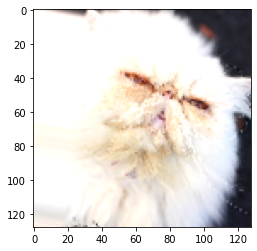

1.0


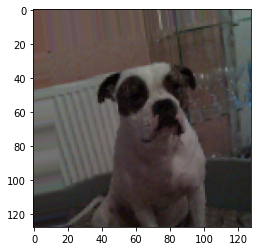

0.0


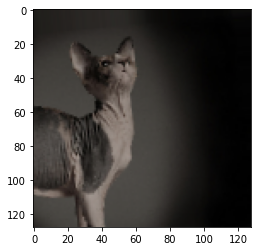

1.0


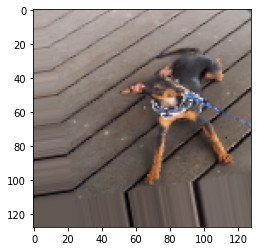

0.0


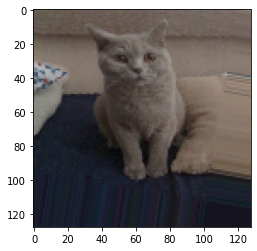

In [54]:
# visualizando algumas imagens e os labels atribuidos ----------------------------
for _ in range(5):
    img, label = train_dataset.next()
    print(label[_])
    plt.imshow(img[_])
    plt.show()

In [11]:
# iniciando a arquitetura
cnn_aug = Sequential()

cnn_aug.add(Conv2D(24, (5,5), activation='relu', input_shape=(128, 128, 3), padding='same'))
cnn_aug.add(MaxPooling2D())  # o  default é 2x2

cnn_aug.add(Conv2D(48, (5,5), activation='relu', padding='same'))
cnn_aug.add(MaxPooling2D())

cnn_aug.add(Conv2D(96, (5,5), activation='relu', padding='same'))
cnn_aug.add(MaxPooling2D())

cnn_aug.add(Conv2D(128, (5,5), activation='relu', padding='same'))
cnn_aug.add(MaxPooling2D())

cnn_aug.add(Flatten())
cnn_aug.add(Dense(32, activation='relu'))

cnn_aug.add(Dense(1)) # importante que a última camada tenha mesma quantidade de classes da saída
cnn_aug.add(Activation('sigmoid'))
                 
cnn_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        115296    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [12]:
cnn_aug.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

checkpoint = [tf.keras.callbacks.ModelCheckpoint(
                filepath="cnn_augmentation.keras",
                save_best_only=True,
                monitor="val_loss")]

# Treinamento
historico_cnn_aug = cnn_aug.fit(train_dataset,
                    epochs = 25, 
                    verbose = 1,
                    batch_size = 32,
                    validation_data = val_dataset,
                    callbacks = [es, checkpoint])

Epoch 1/25
81/81 [==============================] - 73s 773ms/step - loss: 0.6636 - accuracy: 0.6669 - val_loss: 0.6353 - val_accuracy: 0.6608
Epoch 2/25
81/81 [==============================] - 48s 597ms/step - loss: 0.6477 - accuracy: 0.6779 - val_loss: 0.6234 - val_accuracy: 0.6628
Epoch 3/25
81/81 [==============================] - 49s 602ms/step - loss: 0.6222 - accuracy: 0.6758 - val_loss: 0.5867 - val_accuracy: 0.6601
Epoch 4/25
81/81 [==============================] - 49s 607ms/step - loss: 0.5990 - accuracy: 0.6822 - val_loss: 0.6715 - val_accuracy: 0.6730
Epoch 5/25
81/81 [==============================] - 48s 592ms/step - loss: 0.5858 - accuracy: 0.6953 - val_loss: 0.5394 - val_accuracy: 0.7224
Epoch 6/25
81/81 [==============================] - 48s 594ms/step - loss: 0.5740 - accuracy: 0.7106 - val_loss: 0.5434 - val_accuracy: 0.7420
Epoch 7/25
81/81 [==============================] - 48s 593ms/step - loss: 0.5478 - accuracy: 0.7125 - val_loss: 0.4902 - val_accuracy: 0.7637

In [ ]:
# treino aparentemente demorou um puco mais do que a rede CNN sem augmentation
# antes, a média era de 31s cada época ... agora 48s

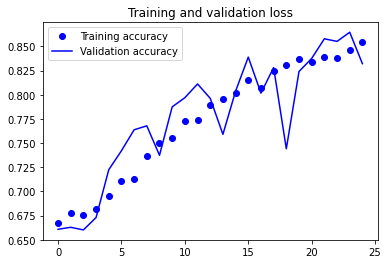

In [14]:
accuracy = historico_cnn_aug.history['accuracy']
val_accuracy = historico_cnn_aug.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
# além de aumentar o val accuracy, reduziu bem o overfit
# o val accuracy foi de 0.80 para 0.86 (considerando a melhor época de cada treino)

In [37]:
img, label = test_dataset[7]
print(label)
print(img.shape)

[1.]
(1, 128, 128, 3)


[1.]


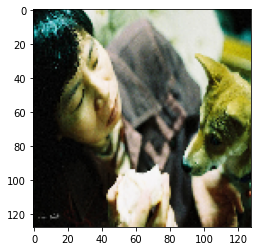

In [38]:
print(label)
plt.imshow(img[0])
plt.show()

In [109]:
cnn_aug = tf.keras.models.load_model('cnn_augmentation.keras')  # pegando o modelo com melhor resultado

In [63]:
cnn_aug.predict(test_dataset[7][0])

array([[0.8061161]], dtype=float32)

[0.]


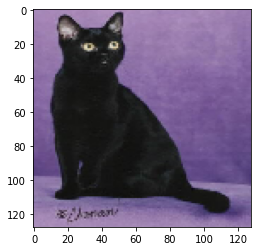

In [67]:
img, label = test_dataset[9]
print(label)
plt.imshow(img[0])
plt.show()

In [68]:
cnn_aug.predict(test_dataset[9][0])

array([[0.05145297]], dtype=float32)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
y_pred = cnn_aug.predict(test_dataset, batch_size=1)
y_pred = np.argmax(y_pred, axis=1)

print('\nConfusion Matrix')
print(confusion_matrix(test_dataset.classes, y_pred))
print('\nClassification Report')
target_names = ['Cats', 'Dogs']
print(classification_report(test_dataset.classes, y_pred, target_names=target_names))


Confusion Matrix
[[215   0]
 [525   0]]

Classification Report
              precision    recall  f1-score   support

        Cats       0.29      1.00      0.45       215
        Dogs       0.00      0.00      0.00       525

    accuracy                           0.29       740
   macro avg       0.15      0.50      0.23       740
weighted avg       0.08      0.29      0.13       740



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
accuracy_score(test_dataset.classes, y_pred)

0.2905405405405405

In [107]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [110]:
y_pred = cnn_aug.predict(test_dataset, batch_size=1)
y_pred

array([[9.9962211e-01],
       [1.2900725e-01],
       [3.8354814e-01],
       [4.9963078e-01],
       [8.6577040e-01],
       [9.9892896e-01],
       [7.2730112e-01],
       [7.3905939e-01],
       [2.9785649e-04],
       [2.2094049e-01],
       [9.4329000e-01],
       [9.8714983e-01],
       [6.0849065e-01],
       [9.6959496e-01],
       [2.4616680e-01],
       [1.0000000e+00],
       [2.2003832e-01],
       [6.2409163e-01],
       [3.1773949e-01],
       [3.5944015e-02],
       [7.9134309e-01],
       [9.9999678e-01],
       [1.8051323e-01],
       [6.4484174e-03],
       [9.9902976e-01],
       [7.8666806e-01],
       [1.9491307e-02],
       [9.9998975e-01],
       [9.8636395e-01],
       [8.2324201e-01],
       [7.2421893e-02],
       [9.9816740e-01],
       [6.6860521e-01],
       [9.9881160e-01],
       [9.3509340e-01],
       [9.9989831e-01],
       [1.4434412e-01],
       [9.7084326e-01],
       [9.9759030e-01],
       [2.2445257e-01],
       [8.7996131e-01],
       [8.445069

In [113]:
np.argmax(y_pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,